<a href="https://colab.research.google.com/github/jhala-karansinh/KZ29127414/blob/main/TitanicSurvivalPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical - 10

Name : **Zala Karansinh Shaktisinh**

Enrollment No. : **190170107157**



### **Titanic Survival Prediction**

**Step 1** : Importing Dependencies(Libraries).

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Step 2** : Data Collection

In [12]:
# loading the data from csv to pandas dataFrame

titanicData = pd.read_csv('/content/train.csv')

In [13]:
# printing first 5 row of Dataset for displaying features of dataset
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# here data represents...

# PassengerId = id of passenger
# Survived = if passenger survived the disaster(as 1) or not(as 0)
# Pclass = which class passenger booked the ticket
# Name = name of the passenger
# Sex = gender of the passenger
# Age = age of the passenger
# SibSp = no of Siblings/Spouse passenger have
# Parch = no of Parents/Child passenger have
# Ticket = ticket number of the passenger
# Fare = how much fare passenger paid
# Cabin = passenger is in which cabin
# Embarked = embarked from which depot

In [15]:
# getting dimensions of Dataset

titanicData.shape

(891, 12)

In [16]:
# getting information of dataset

titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# check the number of missing value in each column

titanicData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Step 3** : Data Pre-processing (Handling Missing Value)

In [25]:
# droping Cabin Column as it contains only 204 values(rests are null)

titanicData = titanicData.drop(colums = 'Cabin',axis = 1)

In [30]:
# replacing null value with mean value in age field

titanicData['Age'].fillna(titanicData['Age'].mean(),inplace = True)

In [37]:
# replacing null value with the catagorical mode in Embarked field

titanicData['Embarked'].fillna(titanicData['Embarked'].mode()[0],inplace = True)

In [38]:
# checking if any null(missing) value is there or not

titanicData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Step 4** : Data Analysis

In [39]:
# getting some statistical data of our data set

titanicData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
# finding the number of people survived/not survived

titanicData['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Step 5** : Data Visualizaion

In [41]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


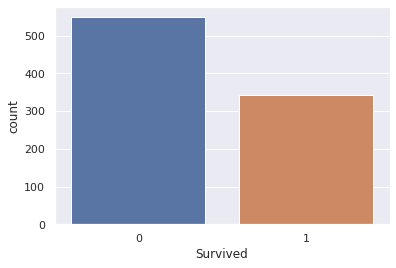

In [43]:
# ploting count for Survived filed

sns.countplot('Survived',data = titanicData)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


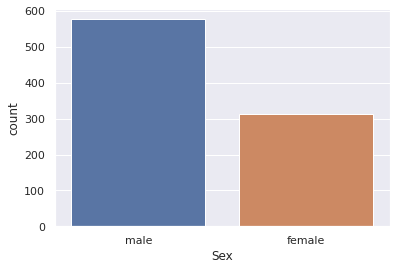

In [44]:
# ploting count for Sex field

sns.countplot('Sex',data = titanicData)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


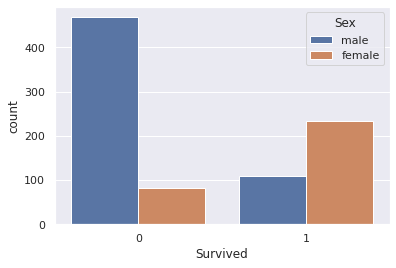

In [46]:
# ploting number of survivers based on gender

sns.countplot('Survived',hue = 'Sex',data = titanicData)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


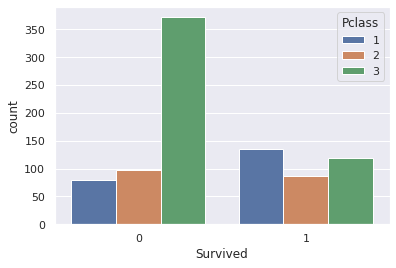

In [48]:
# ploting number of survivers based on Pclass

sns.countplot('Survived',hue = 'Pclass',data = titanicData)

**Step 6** : Encoding Catagorical Fields

In [50]:
# checking how many values are there in Sex Field

titanicData['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [51]:
# checking how many values are there in Embarked Field

titanicData['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
 # replacing catagorical columns to numeric value

 titanicData.replace({'Sex' : {'male' : 0,'female' : 1},'Embarked' : {'S' : 0,'C' : 1,'Q' : 2}},inplace = True)

In [53]:
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


**Step 7** : Separating Features & Target Column

In [61]:
# putting all the features into X

X = titanicData.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis = 1)

# putting the Target field 'Survived' in Y

Y = titanicData['Survived']

In [59]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [60]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


**Step 8** : Splitting the data into Training Data and Testing Data

In [62]:
Xtrain,Xtest = train_test_split(X,test_size = 0.2,random_state = 2)

In [63]:
print(Xtrain)

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
30        1    0  40.000000      0      0   27.7208         1
10        3    1   4.000000      1      1   16.7000         0
873       3    0  47.000000      0      0    9.0000         0
182       3    0   9.000000      4      2   31.3875         0
876       3    0  20.000000      0      0    9.8458         0
..      ...  ...        ...    ...    ...       ...       ...
534       3    1  30.000000      0      0    8.6625         0
584       3    0  29.699118      0      0    8.7125         1
493       1    0  71.000000      0      0   49.5042         1
527       1    0  29.699118      0      0  221.7792         0
168       1    0  29.699118      0      0   25.9250         0

[712 rows x 7 columns]


In [64]:
print(Xtest)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
707       1    0  42.000000      0      0  26.2875         0
37        3    0  21.000000      0      0   8.0500         0
615       2    1  24.000000      1      2  65.0000         0
169       3    0  28.000000      0      0  56.4958         0
68        3    1  17.000000      4      2   7.9250         0
..      ...  ...        ...    ...    ...      ...       ...
89        3    0  24.000000      0      0   8.0500         0
80        3    0  22.000000      0      0   9.0000         0
846       3    0  29.699118      8      2  69.5500         0
870       3    0  26.000000      0      0   7.8958         0
251       3    1  29.000000      1      1  10.4625         0

[179 rows x 7 columns]


In [65]:
Ytrain,Ytest = train_test_split(Y,test_size = 0.2,random_state = 2)

In [66]:
print(Ytrain)

30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 712, dtype: int64


In [67]:
print(Ytest)

707    1
37     0
615    1
169    0
68     1
      ..
89     0
80     0
846    0
870    0
251    0
Name: Survived, Length: 179, dtype: int64


In [70]:
# getting dimension of testing and Training Data

print(X.shape,Xtrain.shape,Xtest.shape)

(891, 7) (712, 7) (179, 7)


**Step 9** : Training the Model

In [72]:
# taking model as a linear regression model better for binary prediction

model = LogisticRegression()

In [84]:
# fitting features(X) and givving target field(y)
model.fit(Xtrain,Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**Step 10** : Evaluation of our Model

1) Accuracy of Training Data

In [85]:
#storing prediction of training data set

XtrainPrediction = model.predict(Xtrain)

print(XtrainPrediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [86]:
#calculating Accuracy of Training Data(XtrainPrediction with Ytrain)

trainingAccuracy = accuracy_score(Ytrain,XtrainPrediction)

print(trainingAccuracy)

0.8075842696629213


2) Accuracy of Testing Data

In [87]:
#storing Prediction of test dataset

XtestPrediction = model.predict(Xtest)

print(XtestPrediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [89]:
#calculating Accuracy of Testng Data(XtestPrediction with Ytest)

testAccuracy = accuracy_score(XtestPrediction,Ytest)

print(testAccuracy)

0.7821229050279329
